In [1]:
infile = open('input.txt')
inlist = [elem.strip() for elem in infile.readlines()]

coords = [[int(val) for val in elem.split(',')] for elem in inlist if ('fold' not in elem and elem != '')]

In [2]:
folds = [elem.strip('fold along ') for elem in inlist if 'fold' in elem]

In [3]:
folds[0]

'x=655'

In [4]:
x = 655

In [5]:
newcoords = []
for coord in coords:
    if coord[0] < x:
        if coord not in newcoords: newcoords.append(coord)
    if coord[0] > x:
        newx = coord[0] - ((coord[0]-x)*2)
        newcoord = [newx, coord[1]]
        if newcoord not in newcoords: newcoords.append(newcoord)
len(newcoords)

592

In [6]:
def foldx(coordlist, x):
    newcoords = []
    for coord in coordlist:
        if coord[0] < x:
            if coord not in newcoords: newcoords.append(coord)
        if coord[0] > x:
            newx = coord[0] - ((coord[0]-x)*2)
            newcoord = [newx, coord[1]]
            if newcoord not in newcoords: newcoords.append(newcoord)
    return(newcoords)
            
def foldy(coordlist, y):
    newcoords = []
    for coord in coordlist:
        if coord[1] < y:
            if coord not in newcoords: newcoords.append(coord)
        if coord[1] > y:
            newy = coord[1] - ((coord[1]-y)*2)
            newcoord = [coord[0], newy]
            if newcoord not in newcoords: newcoords.append(newcoord)
    return(newcoords)

In [7]:
updated = []
for fold in folds:
    instruction = fold.split('=')
    if instruction[0] == 'x': 
        updated = foldx(coords, int(instruction[1]))
    elif instruction[0] == 'y':
        updated = foldy(coords, int(instruction[1]))
    coords = updated

In [8]:
maxx, maxy = 0, 0
for coord in coords:
    if coord[0] > maxx: maxx = coord[0]
    if coord[1] > maxy: maxy = coord[1]

In [9]:
import numpy as np

In [10]:
code = np.zeros((maxy+1, maxx+1))

In [11]:
for coord in coords:
    code[coord[1],coord[0]] = 1

In [12]:
import matplotlib.pyplot as plt

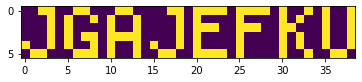

In [13]:
plt.imshow(code)